## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#There are no null values

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# There is no missing values in the dataset

## Data Visualization

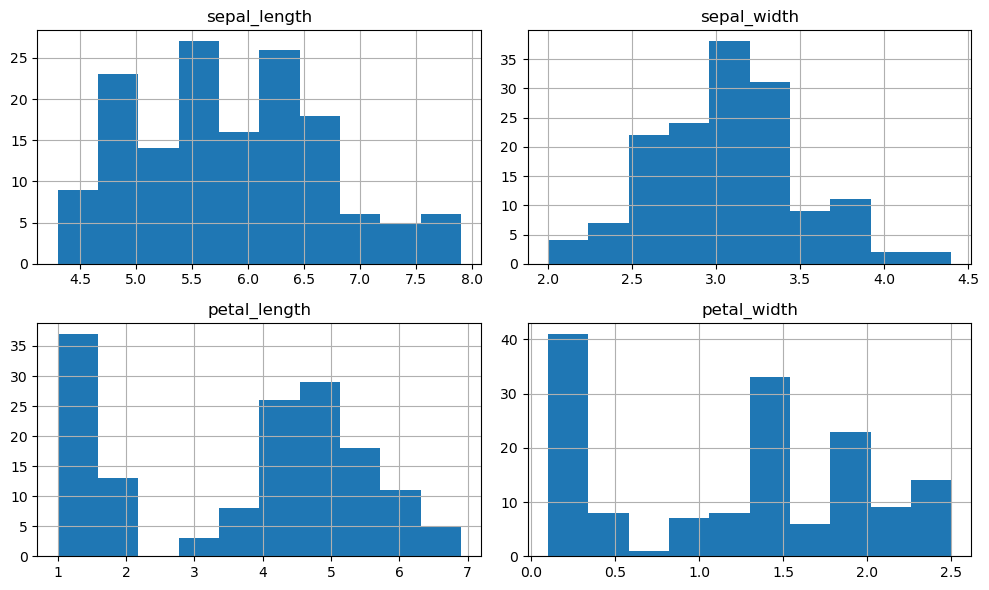

In [8]:
# Histograms
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

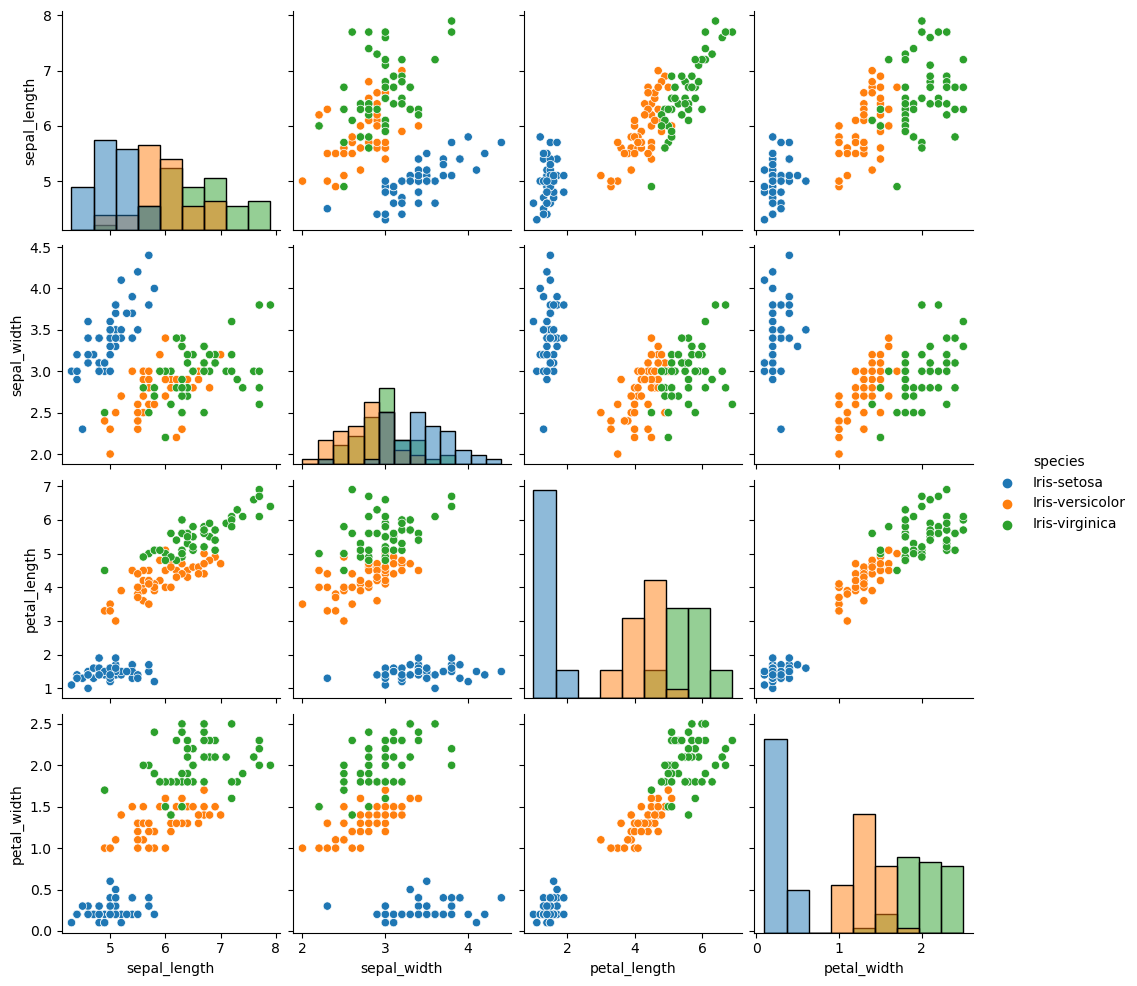

In [9]:
# Scatter Plots
sns.pairplot(data, hue='species', diag_kind='hist')
plt.show()

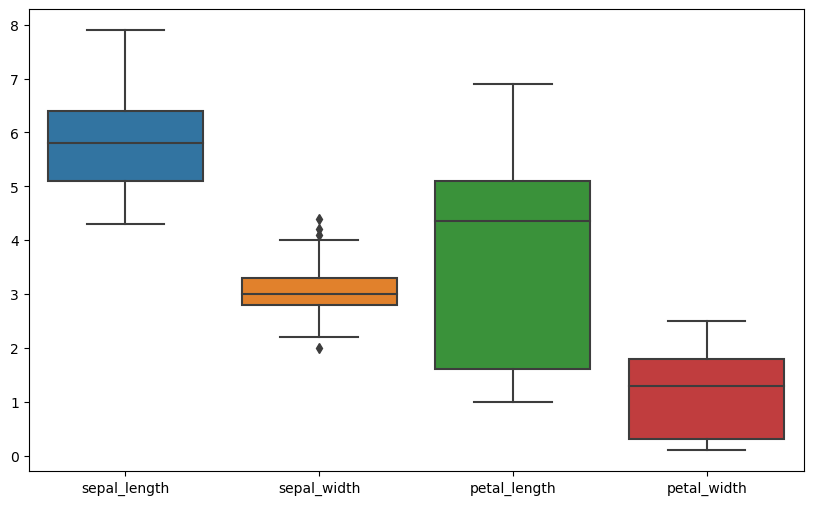

In [10]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

In [11]:
# There are some outliers in the sepal_width

## Removing the outliers

In [12]:
q1 = data["sepal_width"].quantile(0.25)
q3 = data["sepal_width"].quantile(0.75)
iqr = q3 - q1

In [13]:
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [14]:
data[~((data["sepal_width"]>= lower_bound) & (data["sepal_width"]<= upper_bound))]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [15]:
# These are the outliers 

In [16]:
print("The percentage of the outliers is", (4/150)*100)

The percentage of the outliers is 2.666666666666667


In [17]:
# As the outliers are very less so dropping them form our data is very much safe.

In [18]:
data = data[(data["sepal_width"]>= lower_bound) & (data["sepal_width"]<= upper_bound)]
data.reset_index(drop=True, inplace=True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica
142,6.3,2.5,5.0,1.9,Iris-virginica
143,6.5,3.0,5.2,2.0,Iris-virginica
144,6.2,3.4,5.4,2.3,Iris-virginica


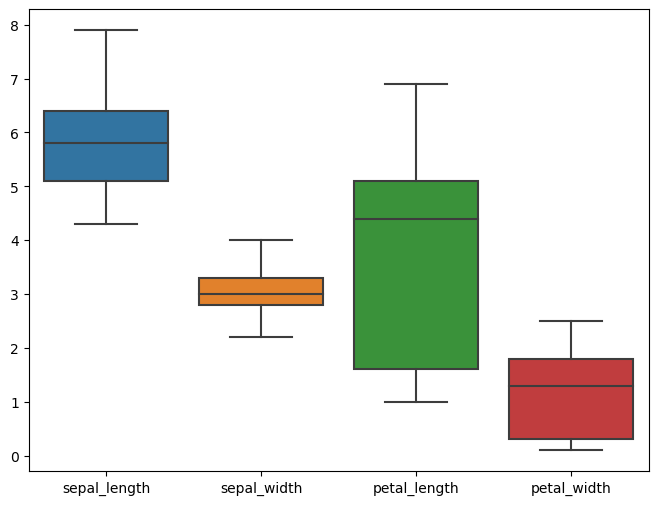

In [19]:
# Box Plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.show()

In [20]:
# Here we can clearly see that the outliers were seen in the above boxplot are romoved

## Encoding the target variable

In [21]:
# Initialize labelencoder
label_encoder=LabelEncoder()

#Fit and Transform The selected column
data["species"]=label_encoder.fit_transform(data["species"])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,2.5,5.0,1.9,2
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


In [22]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Splitting the dataset into Training & Testing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [24]:
X_train

array([[7.3, 2.9, 6.3, 1.8],
       [5.7, 2.8, 4.5, 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.5, 1.3, 0.3],
       [6.8, 3.2, 5.9, 2.3],
       [6.1, 2.8, 4.7, 1.2],
       [7.1, 3. , 5.9, 2.1],
       [5.7, 2.6, 3.5, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.5, 2.4, 3.7, 1. ],
       [5.6, 2.7, 4.2, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [7.4, 2.8, 6.1, 1.9],
       [6.4, 2.7, 5.3, 1.9],
       [6.6, 3. , 4.4, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.6, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.9, 5.6, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [6.4, 3.1, 5.5, 1.8],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3. , 1.6, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [5.6, 3

In [25]:
X_test

array([[4.8, 3.1, 1.6, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [5.9, 3. , 5.1, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.4, 2.8, 5.6, 2.1],
       [6.1, 2.8, 4. , 1.3],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3. , 5.2, 2.3],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [7.7, 2.8, 6.7, 2. ],
       [4.7, 3.2, 1.6, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.6, 2.9, 4.6, 1.3],
       [6.7, 3. , 5. , 1.7],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.1, 3.5, 1.4, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.5, 4. , 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3]])

## Feature scaling

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 1.72920913, -0.35499648,  1.44604343,  0.82181072],
       [-0.13781364, -0.6001131 ,  0.43758028,  0.15979653],
       [-1.07132503,  0.13523676, -1.24319164, -1.42903753],
       [-0.9546361 ,  1.11570324, -1.3552431 , -1.16423186],
       [ 1.14576451,  0.38035338,  1.2219405 ,  1.48382491],
       [ 0.32894205, -0.6001131 ,  0.54963174,  0.02739369],
       [ 1.49583128, -0.10987986,  1.2219405 ,  1.21901924],
       [-0.13781364, -1.09034635, -0.12267703, -0.23741199],
       [ 1.26245343,  0.38035338,  1.10988904,  1.48382491],
       [-0.37119149, -1.58057959, -0.01062557, -0.23741199],
       [-0.25450256, -0.84522973,  0.26950308,  0.15979653],
       [-0.02112472, -0.84522973,  0.77373466,  0.95421356],
       [-0.48788041, -0.10987986,  0.43758028,  0.42460221],
       [-1.18801395,  0.87058662, -1.01908872, -1.29663469],
       [ 0.5623199 , -0.84522973,  0.6616832 ,  0.82181072],
       [ 1.84589805, -0.6001131 ,  1.33399196,  0.95421356],
       [ 0.67900882, -0.

In [28]:
X_test

array([[-1.18801395,  0.13523676, -1.18716591, -1.29663469],
       [-0.83794718,  1.11570324, -1.29921737, -1.16423186],
       [ 0.79569774, -0.10987986,  1.16591477,  1.35142208],
       [ 0.0955642 ,  0.38035338,  0.60565747,  0.82181072],
       [ 0.5623199 ,  0.62547   ,  0.54963174,  0.55700504],
       [ 0.0955642 , -0.10987986,  0.77373466,  0.82181072],
       [ 0.67900882, -0.6001131 ,  1.05386331,  1.35142208],
       [ 0.67900882, -0.6001131 ,  1.05386331,  1.21901924],
       [ 0.32894205, -0.6001131 ,  0.15745162,  0.15979653],
       [ 0.21225313,  0.87058662,  0.43758028,  0.55700504],
       [ 1.02907559, -0.10987986,  0.82976039,  1.48382491],
       [-0.48788041,  0.87058662, -1.13114018, -1.29663469],
       [ 1.02907559,  0.62547   ,  1.10988904,  1.74863059],
       [ 2.19596482, -0.6001131 ,  1.67014635,  1.0866164 ],
       [-1.30470287,  0.38035338, -1.18716591, -1.29663469],
       [ 0.67900882,  0.38035338,  0.43758028,  0.42460221],
       [-0.02112472, -0.

## Model building

### Logistic Regression

In [29]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
# Training accuracy
y_pred_train_lr = classifier_lr.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train_lr)
print(cm)
accuracy_score(y_train, y_pred_train_lr)

[[40  0  0]
 [ 0 36  1]
 [ 0  3 36]]


0.9655172413793104

In [31]:
y_pred_lr = classifier_lr.predict(X_test)

In [32]:
# Testing accuracy
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
accuracy_score(y_test, y_pred_lr)

[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


0.9

### Decision Tree

In [33]:
classifier_dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [34]:
# Training accuracy
y_pred_train_dt = classifier_dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train_dt)
print(cm)
accuracy_score(y_train, y_pred_train_dt)

[[40  0  0]
 [ 0 37  0]
 [ 0  0 39]]


1.0

In [35]:
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


0.9

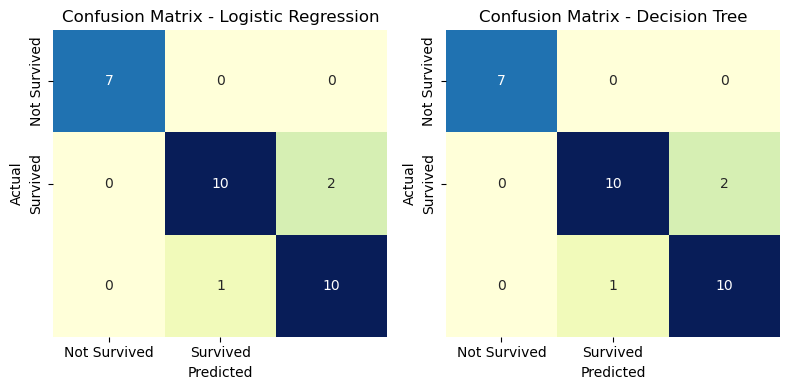

In [36]:
# Import necessary library
import seaborn as sns

# Create confusion matrices
conf_matrices = {
    'Logistic Regression': confusion_matrix(y_test, y_pred_lr),
    'Decision Tree': confusion_matrix(y_test, y_pred_dt)
}

# Plot confusion matrices
plt.figure(figsize=(8, 4))
for i, (models, matrix) in enumerate(conf_matrices.items(), 1):
    plt.subplot(1, 2, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
                xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix - {models}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


## AUC-ROC Curve

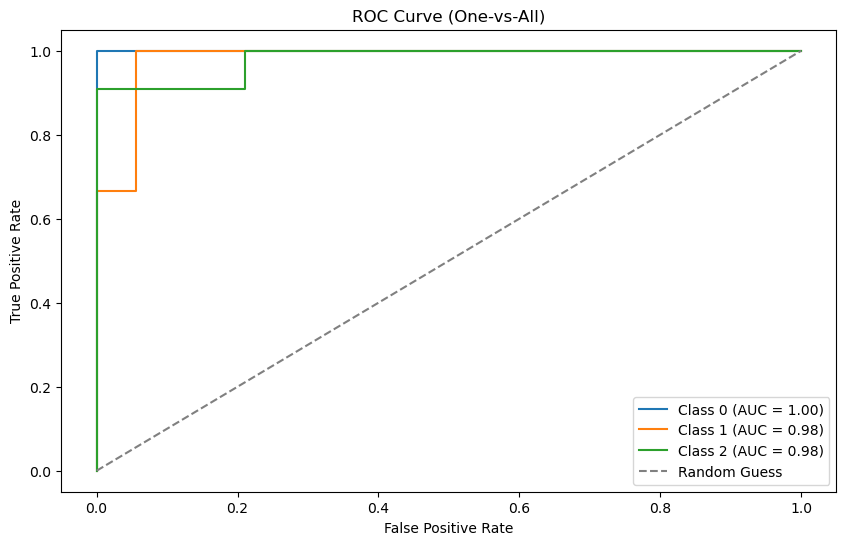

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve for each class (one-vs-all)
fpr_lr = dict()
tpr_lr = dict()
auc_lr = dict()
for i in range(3):  # 3 is the number of unique classes in y_test
    fpr_lr[i], tpr_lr[i], _ = roc_curve((y_test == i).astype(int), classifier_lr.predict_proba(X_test)[:, i])
    auc_lr[i] = roc_auc_score((y_test == i).astype(int), classifier_lr.predict_proba(X_test)[:, i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f'Class {i} (AUC = {auc_lr[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-All)')
plt.legend()
plt.show()


In [38]:
new_data_point = np.array([])
for i in data.columns[0:-1]:
    value = float(input("Input value for {} ".format(i)))
    new_data_point = np.append(new_data_point,value)
new_data_point

Input value for sepal_length 5
Input value for sepal_width 3.7
Input value for petal_length 1.9
Input value for petal_width 0.7


array([5. , 3.7, 1.9, 0.7])

In [39]:
# Reshape the data point to match the shape expected by XGBoost
new_data_point_reshaped = new_data_point.reshape(1, -1)

# Predict the class for the single data point
models = ['Logistic Regression','Decision Tree']
for model_name in models:
    if model_name == 'Logistic Regression':
        print("The prediction made by the Logistic Regression Model")
        prediction = classifier_lr.predict(new_data_point_reshaped)
        predicted_probabilities = classifier_lr.predict_proba(new_data_point_reshaped)
    else:
        print("The prediction made by the 'Decision Tree' Model")
        prediction = classifier_dt.predict(new_data_point_reshaped)
        predicted_probabilities = classifier_dt.predict_proba(new_data_point_reshaped)
    
    print("Predicted Class:", prediction)
    print("Predicted Probabilities:", predicted_probabilities) 
    print(" ")

The prediction made by the Logistic Regression Model
Predicted Class: [2]
Predicted Probabilities: [[1.51731512e-05 3.81807928e-02 9.61804034e-01]]
 
The prediction made by the 'Decision Tree' Model
Predicted Class: [2]
Predicted Probabilities: [[0. 0. 1.]]
 
